In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('cereal.csv')

In [3]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [4]:
# Take a subset of the data to make plots clearer

cereal = df.loc[:, 'calories':'vitamins']

In [5]:
# Create a dataframe of random noise (or "jitter") and add it only when plotting

# Make a copy of the data to add jitter to and plot

cereal_jitter = cereal.loc[:, 'calories':'vitamins'].dropna()

In [6]:
# Create random noise

jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(cereal_jitter.shape)),
    columns=cereal_jitter.columns
)

In [7]:
# Combine the data & the noise

cereal_jitter = cereal_jitter.add(jitter)

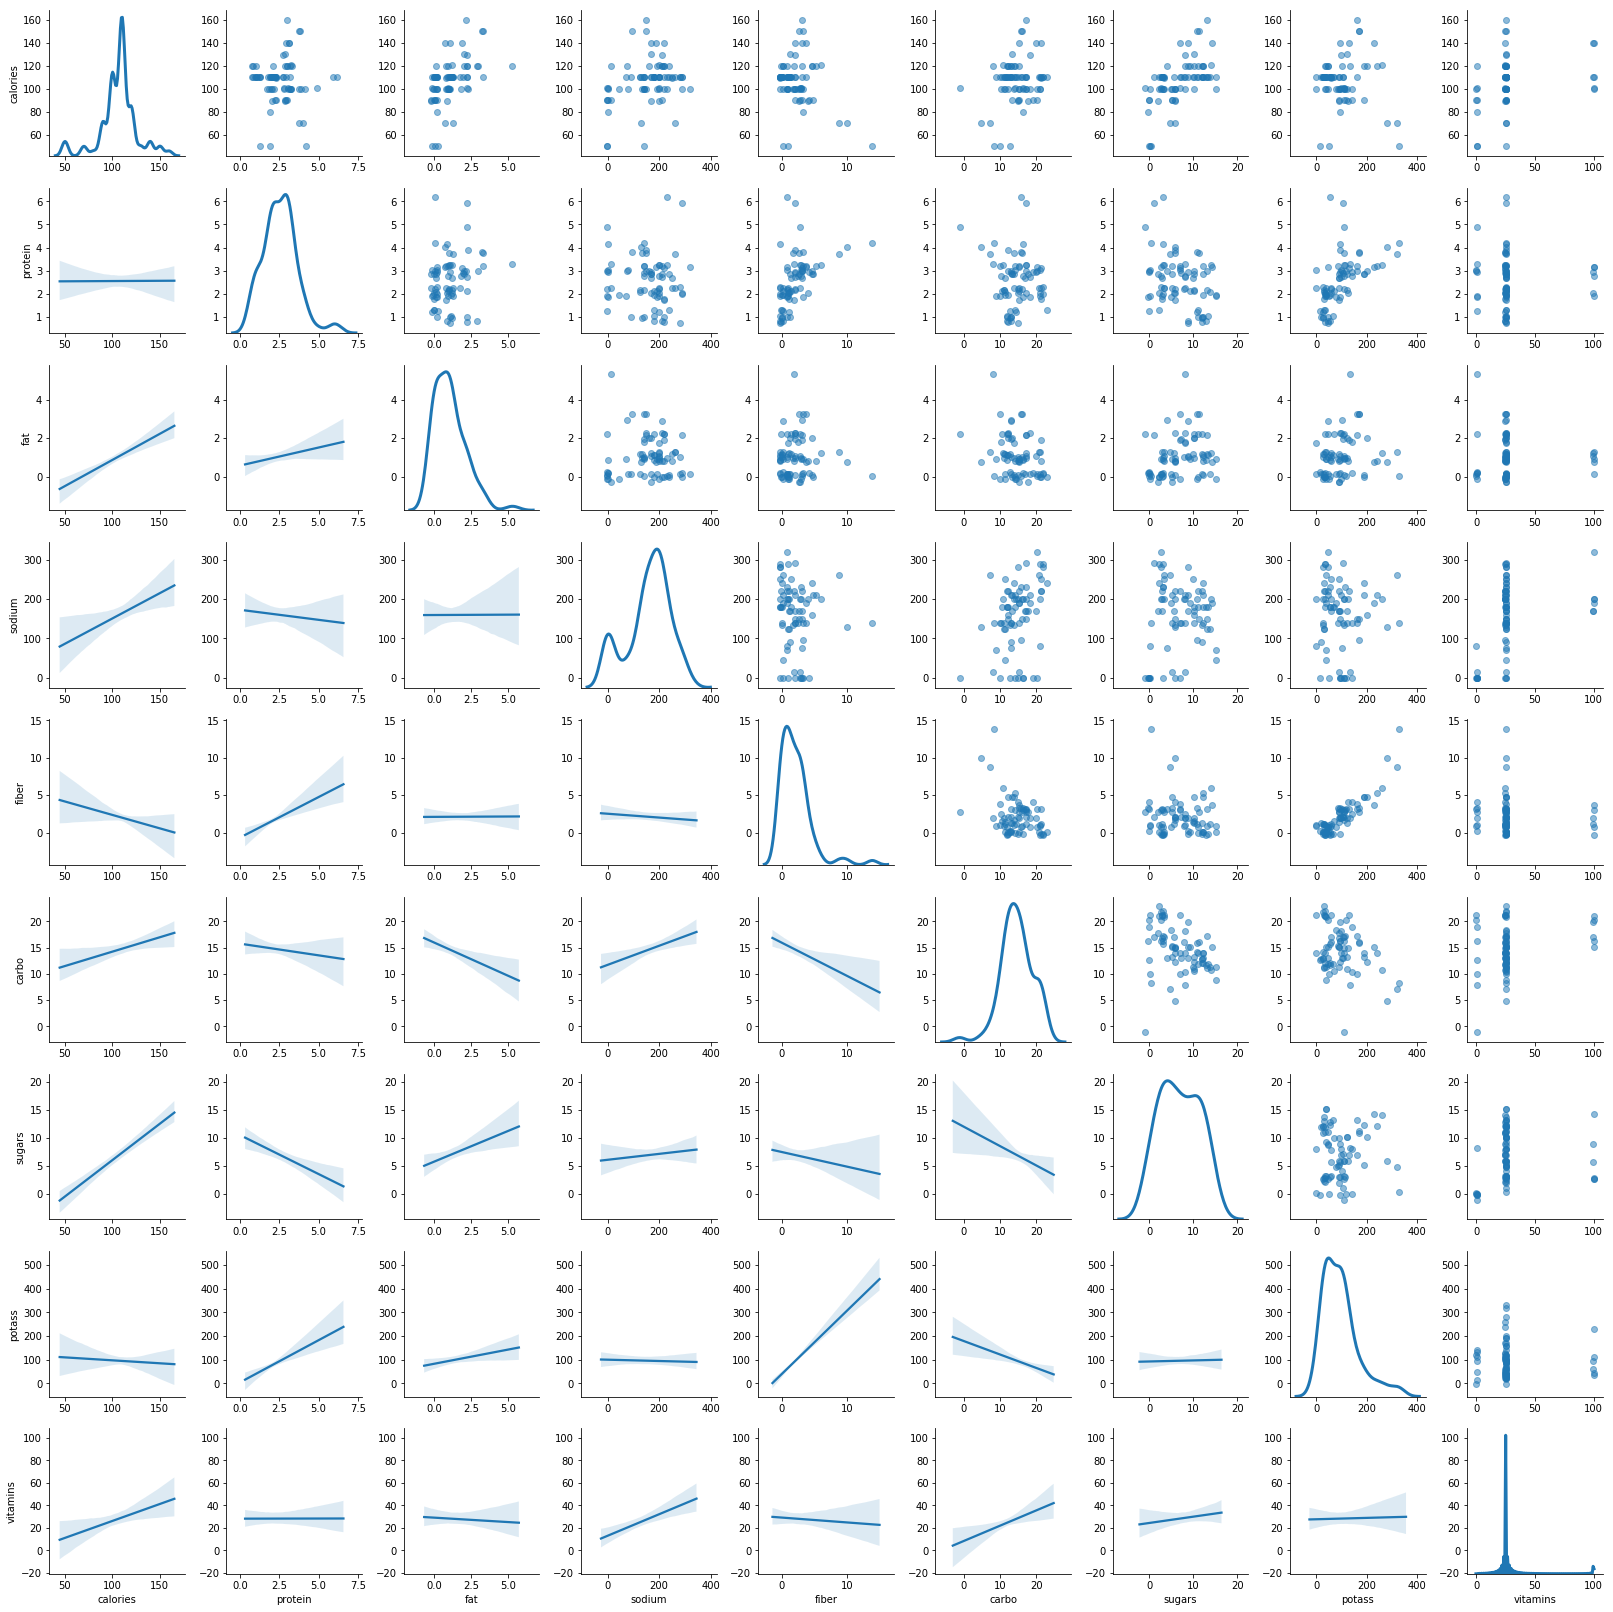

In [8]:
# Declare that you want to make a scatterplot matrix.

g = sns.PairGrid(cereal_jitter.dropna(), diag_sharey=False)

# Scatterplot

g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.

g.map_diag(sns.kdeplot, lw=3)
plt.show()

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.250681   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.130864   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.318043   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.355983   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.356083   
carbo     0.250681 -0.130864 -0.318043  0.355983 -0.356083  1.000000   
sugars    0.562340 -0.329142  0.270819  0.101451 -0.141205 -0.331665   
potass   -0.066609  0.549407  0.193279 -0.032603  0.903374 -0.349685   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.258148   

            sugars    potass  vitamins  
calories  0.562340 -0.066609  0.265356  
protein  -0.329142  0.549407  0.007335  
fat       0.270819  0.193279 -0.031156  
sodium    0.101451 -0.032603  0.361477  
fiber    -0.141205  0.903374 -0.032243  
carbo    -0.331665 -0.349685  0.2

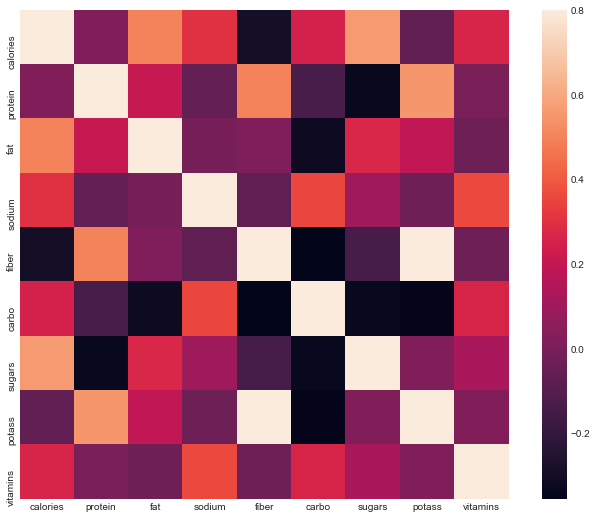

In [67]:
# Make the correlation matrix.

corrmat = cereal.corr()
print(corrmat)

# Set up the matplotlib figure.

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

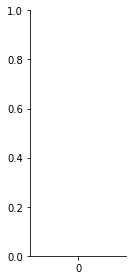

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [10]:
# Plot all the variables with boxplots

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.

df_long = df
df_long = pd.melt(df_long)

g = sns.FacetGrid(df_long, size=4, aspect=.5)
g = g.map(sns.boxplot)
plt.show()

# Descriptive statistics by group.
print(df.describe())

# Test whether group differences are significant.
for col in df.loc[:, 'calories':'vitamins'].columns:
    print(col)
    print(stats.ttest_ind(
        df[df['mfr'] == 'K'][col].dropna(),
        df[df['mfr'] == 'G'][col].dropna()
    ))

**Creating a feature by manufacturer shows where either the highest concentration of data is, or how evenly distributed it is.**

In [11]:
# Making dummies
# Create a data frame to hold features

features = pd.get_dummies(df['mfr'])

# Brands dummy

features['Brands'] = np.where((df['mfr'].isin(['K', 'G'])), 1, 0)

print(pd.crosstab(features['Brands'], df['mfr']))

mfr     A   G   K  N  P  Q  R
Brands                       
0       1   0   0  6  9  8  8
1       0  22  23  0  0  0  0


In [12]:
features['potass_1'] = np.where(df['potass']>= 90, 1, 0)

In [13]:
print(df['potass'].groupby(features['potass_1']).describe())

          count        mean        std   min    25%    50%    75%    max
potass_1                                                                
0          36.0   40.638889  19.289009  -1.0   30.0   40.0   55.0   85.0
1          41.0  144.756098  64.303492  90.0  100.0  120.0  170.0  330.0


In [14]:
features['fiber_1'] = np.where(df['fiber']>= 2, 1, 0)

In [15]:
print(df['fiber'].groupby(features['fiber_1']).describe())

         count      mean       std  min   25%  50%  75%   max
fiber_1                                                      
0         38.0  0.539474  0.562110  0.0  0.00  0.5  1.0   1.5
1         39.0  3.723077  2.433047  2.0  2.25  3.0  4.0  14.0


In [16]:
features['protein_1'] = np.where(df['protein']>= 3, 1, 0)

In [17]:
print(df['protein'].groupby(features['protein_1']).describe())

           count      mean       std  min  25%  50%  75%  max
protein_1                                                    
0           38.0  1.657895  0.480783  1.0  1.0  2.0  2.0  2.0
1           39.0  3.410256  0.785324  3.0  3.0  3.0  4.0  6.0


In [18]:
means = df[['protein','fat','fiber']].mean(axis=0)
stds = df[['protein','fat','fiber']].std(axis=0)
features['Brands'] = ((df[['protein','fat','fiber']] - means) / stds).mean(axis=1)

/Users/jamilab/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/jamilab/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


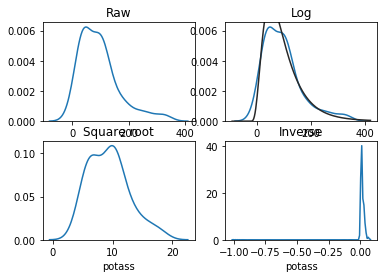

In [19]:
fig = plt.figure()
fig.add_subplot(221) 
sns.distplot(df['potass'].dropna(), hist=False)
plt.title('Raw')

fig.add_subplot(222) 
sns.distplot(df['potass'].dropna(), hist=False, fit=stats.lognorm)
plt.title('Log')

fig.add_subplot(223) 
sns.distplot(df['potass'].dropna()**(1/2.0), hist=False)
plt.title('Square root')

ax3=fig.add_subplot(224) 
sns.distplot(1/df['potass'].dropna(), hist=False) 
plt.title('Inverse') 
plt.show()

In [65]:
# create feature based on log value of potassium

features['potass_log'] = np.log(df['potass'])

/Users/jamilab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# create feature based on square root of potassium

features['sqrt_potass'] = np.sqrt(df['potass'])

/Users/jamilab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


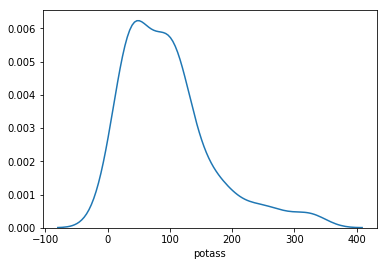

In [21]:
sns.distplot(df['potass'].dropna(), hist=False)
plt.show()

In [22]:
features['sodium_1'] = np.where(df['sodium']>= 180, 1, 0)

In [23]:
print(df['sodium'].groupby(features['sodium_1']).describe())

          count        mean        std    min    25%    50%    75%    max
sodium_1                                                                 
0          38.0   94.078947  65.675855    0.0   15.0  127.5  140.0  170.0
1          39.0  223.589744  36.884398  180.0  200.0  210.0  245.0  320.0


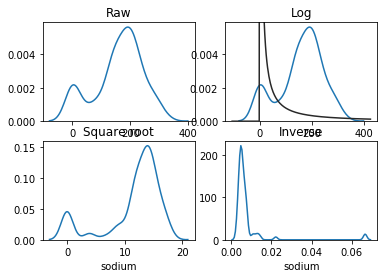

In [24]:
fig = plt.figure()
fig.add_subplot(221) 
sns.distplot(df['sodium'].dropna(), hist=False)
plt.title('Raw')

fig.add_subplot(222) 
sns.distplot(df['sodium'].dropna(), hist=False, fit=stats.lognorm)
plt.title('Log')

fig.add_subplot(223) 
sns.distplot(df['sodium'].dropna()**(1/2.0), hist=False)
plt.title('Square root')

ax3=fig.add_subplot(224) 
sns.distplot(1/df['sodium'].dropna(), hist=False) 
plt.title('Inverse') 
plt.show()

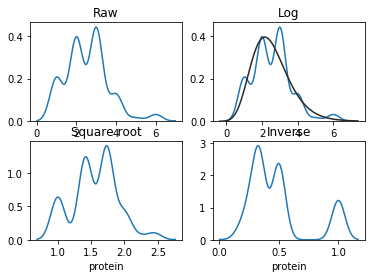

In [25]:
fig = plt.figure()
fig.add_subplot(221) 
sns.distplot(df['protein'].dropna(), hist=False)
plt.title('Raw')

fig.add_subplot(222) 
sns.distplot(df['protein'].dropna(), hist=False, fit=stats.lognorm)
plt.title('Log')

fig.add_subplot(223) 
sns.distplot(df['protein'].dropna()**(1/2.0), hist=False)
plt.title('Square root')

ax3=fig.add_subplot(224) 
sns.distplot(1/df['protein'].dropna(), hist=False) 
plt.title('Inverse') 
plt.show()

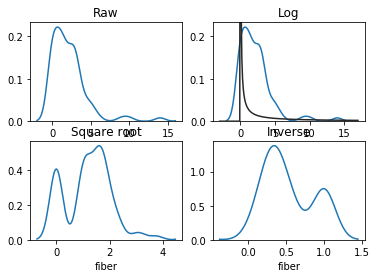

In [26]:
fig = plt.figure()
fig.add_subplot(221) 
sns.distplot(df['fiber'].dropna(), hist=False)
plt.title('Raw')

fig.add_subplot(222) 
sns.distplot(df['fiber'].dropna(), hist=False, fit=stats.lognorm)
plt.title('Log')

fig.add_subplot(223) 
sns.distplot(df['fiber'].dropna()**(1/2.0), hist=False)
plt.title('Square root')

ax3=fig.add_subplot(224) 
sns.distplot(1/df['fiber'].dropna(), hist=False) 
plt.title('Inverse') 
plt.show()

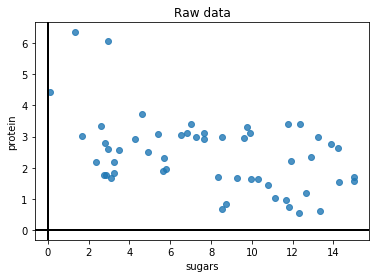

In [27]:
# Take a subset of the data for PCA

df_pca = df.loc[
    ((df['mfr'] == 'G') | (df['mfr'] == 'K') | (df['mfr'] == 'P')),
    ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']
].dropna()

t = sns.regplot(
    'sugars',
    'protein',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

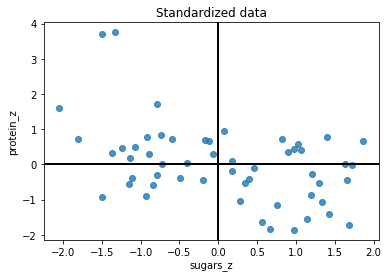

In [28]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_pca['sugars_z'] = (df_pca['sugars'] - df_pca['sugars'].mean()) / df_pca['sugars'].std()
df_pca['protein_z'] = (df_pca['protein'] - df_pca['protein'].mean()) / df_pca['protein'].std()

t = sns.regplot(
    'sugars_z',
    'protein_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

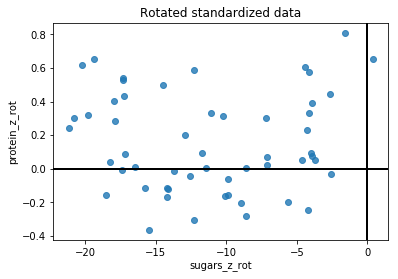

In [29]:
# Rotating the data so that the axes roughly match to vector above

df_pca['sugars_z_rot'] = math.cos(40) * df_pca['sugars'] - math.sin(40) * df_pca['sugars']
df_pca['protein_z_rot'] = math.sin(40) * df_pca['protein'] + math.cos(40) * df_pca['protein']

t = sns.regplot(
    'sugars_z_rot',
    'protein_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

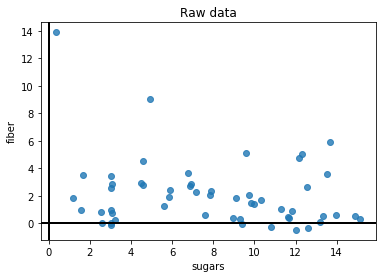

In [30]:
# plot a subset of the data

t = sns.regplot(
    'sugars',
    'fiber',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

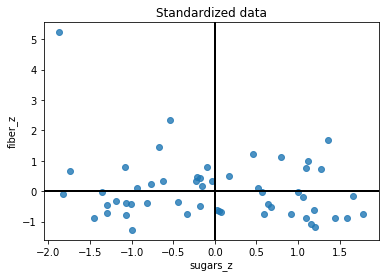

In [31]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_pca['sugars_z'] = (df_pca['sugars'] - df_pca['sugars'].mean()) / df_pca['sugars'].std()
df_pca['fiber_z'] = (df_pca['fiber'] - df_pca['fiber'].mean()) / df_pca['fiber'].std()

t = sns.regplot(
    'sugars_z',
    'fiber_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

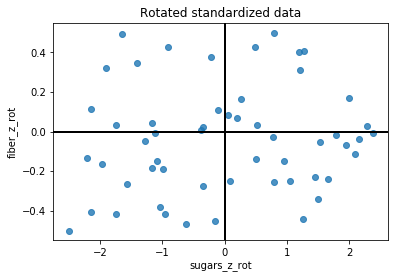

In [32]:
# Rotating the data so that the axes roughly match to vector above

df_pca['sugars_z_rot'] = math.cos(40) * df_pca['sugars_z'] - math.sin(40) * df_pca['sugars_z']
df_pca['fiber_z_rot'] = math.sin(40) * df_pca['fiber_z'] + math.cos(40) * df_pca['fiber_z']

t = sns.regplot(
    'sugars_z_rot',
    'fiber_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

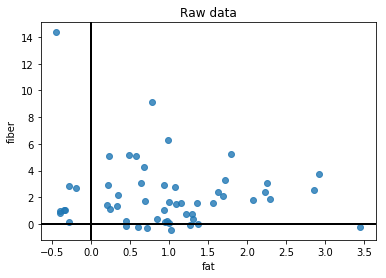

In [33]:
# plot a subset of the data

t = sns.regplot(
    'fat',
    'fiber',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

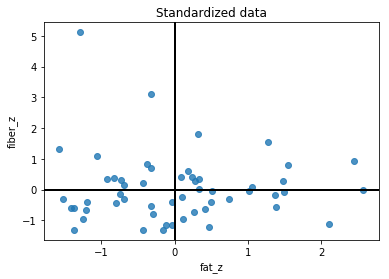

In [34]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_pca['fat_z'] = (df_pca['fat'] - df_pca['fat'].mean()) / df_pca['fat'].std()
df_pca['fiber_z'] = (df_pca['fiber'] - df_pca['fiber'].mean()) / df_pca['fiber'].std()

t = sns.regplot(
    'fat_z',
    'fiber_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

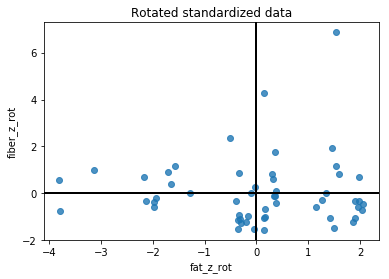

In [35]:
# Rotating the data so that the axes roughly match to vector above

df_pca['fat_z_rot'] = math.cos(40) * df_pca['fat_z'] - math.sin(40) * df_pca['fat_z']
df_pca['fiber_z_rot'] = math.sin(40) * df_pca['fiber_z'] - math.cos(40) * df_pca['fiber_z']

t = sns.regplot(
    'fat_z_rot',
    'fiber_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [36]:
# Take a subset of the data for PCA and drop missing values because PCA cannot handle them. 
# We could also impute, but missingness is quite low so dropping missing rows is unlikely to create bias.

df_pca = df.loc[
    ((df['mfr'] == 'G') | (df['mfr'] == 'K') | (df['mfr'] == 'P')),
    ['fiber', 'protein', 'fat', 'sugars',]
].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation of 1

X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows, not columns, so we transpose X

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.01886792  0.53655364 -0.01098231 -0.22276891]
 [ 0.53655364  1.01886792  0.1064633  -0.45761836]
 [-0.01098231  0.1064633   1.01886792  0.09644956]
 [-0.22276891 -0.45761836  0.09644956  1.01886792]]


In [37]:
# Calculating eigenvalues and eigenvectors 

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.56130126]
 [ 0.65089477]
 [ 0.01680552]
 [-0.51087618]]
Eigenvalue 1: 1.8434923432625978
----------------------------------------
Eigenvector 2: 
[[ 0.49912427]
 [-0.74585577]
 [ 0.19541348]
 [-0.39545886]]
Eigenvalue 2: 0.38928166691846994
----------------------------------------
Eigenvector 3: 
[[ 0.65706925]
 [-0.00320766]
 [-0.25479918]
 [ 0.70945549]]
Eigenvalue 3: 0.7799776986872371
----------------------------------------
Eigenvector 4: 
[[ 0.06384255]
 [ 0.14150931]
 [ 0.94689415]
 [ 0.28158608]]
Eigenvalue 4: 1.0627199892449009
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [ 0.4523384   0.09551819  0.19138342  0.26076   ]


**Eigenvectors 1 and 4 account for over 70% of the variance in the dataset and could be used for accurate predictions.  For increased accuracy, keep eigenvector 3, which would boost the total variance to 90%.**

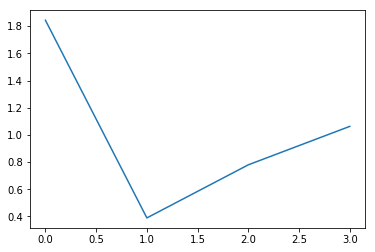

In [38]:
plt.plot(eig_val_cov)
plt.show()

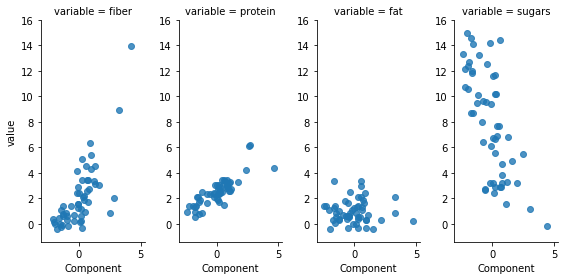

In [39]:
# Create P, which we will use to transform Cx into Cy to get Y, the dimensionally-reduced representation of X

P = eig_vec_cov[:, 0]

# Transform X into Y

Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes

data_to_plot = df_pca[['fiber', 'protein', 'fat', 'sugars']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.4523384   0.26076     0.19138342  0.09551819]


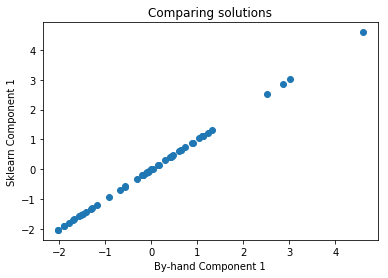

In [40]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [41]:
# pearson correlation coefficient

stats.pearsonr(cereal['protein'], cereal['fiber'])

(0.50033004278115656, 3.5958476623668782e-06)

In [42]:
stats.pearsonr(cereal['sugars'], cereal['fiber'])

(-0.14120539454136752, 0.22059252147567684)

In [43]:
stats.pearsonr(cereal['fat'], cereal['fiber'])

(0.016719237409478907, 0.88524690473112766)

In [44]:
stats.pearsonr(cereal['calories'], cereal['fiber'])

(-0.29341275179832155, 0.0096018966759907481)

**Based on the pearson correlations, the data is not highly correlated and features could likely be selected and identified according to manufacturer.**